In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('driver-data.csv')

In [3]:
df.shape

(4000, 3)

In [4]:
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [6]:
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [7]:
from sklearn.cluster import KMeans

In [9]:
kmeans = KMeans(n_clusters = 2)
df_analyze = df.drop('id', axis=1)

In [10]:
kmeans.fit(df_analyze)

KMeans(n_clusters=2)

In [12]:
kmeans.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [13]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[0 0 0 ... 1 1 1]
4000


In [16]:
print(type(kmeans.labels_))
unique, counts= np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 3200, 1: 800}


/usr/local/lib/python3.7/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


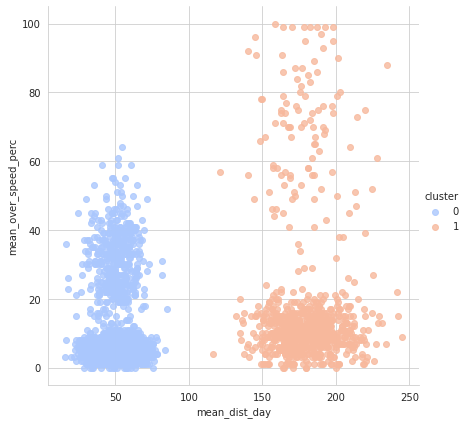

In [18]:
df_analyze['cluster']=kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day', 'mean_over_speed_perc', data=df_analyze, hue='cluster', 
           palette='coolwarm', size=6, aspect=1, fit_reg=False)

In [20]:
kmeans_4 = KMeans(n_clusters=4)
kmeans_4.fit(df.drop('id', axis=1))
print(kmeans_4.cluster_centers_)
unique, counts= np.unique(kmeans_4.labels_, return_counts=True)

[[180.34311782  10.52011494]
 [ 49.98428468   5.21441441]
 [177.83509615  70.28846154]
 [ 50.46127059  32.42823529]]


In [21]:
kmeans_4.cluster_centers_
print(dict(zip(unique, counts)))

{0: 696, 1: 2775, 2: 104, 3: 425}


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


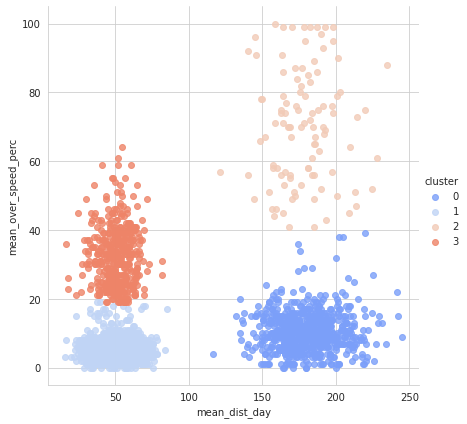

In [23]:
df_analyze['cluster']=kmeans_4.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day', 'mean_over_speed_perc', data=df_analyze, hue='cluster', 
           palette='coolwarm', size=6, aspect=1, fit_reg=False)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


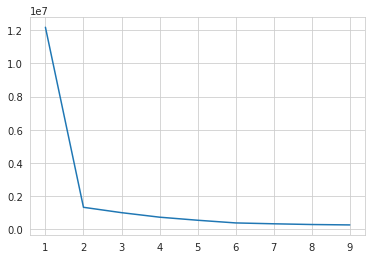

In [26]:
#Elbow Method --- Metric WCSS (Within Cluster Sum of Square)
features=df.iloc[:, 1:]
wcss = []
for i in range(1,10):
    modelCheck = KMeans(n_clusters=i)
    modelCheck.fit(features)
    wcss.append(modelCheck.inertia_)
    
plt.plot(range(1,10),wcss)

In [27]:
kmeans_6 = KMeans(n_clusters=6)
kmeans_6.fit(features)
print(kmeans_6.cluster_centers_)
unique, counts= np.unique(kmeans_6.labels_, return_counts=True)

[[ 57.85701936   5.28215768]
 [166.37329815  10.39841689]
 [ 41.52009623   5.39600296]
 [176.63676768  71.53535354]
 [ 50.61421836  33.06203474]
 [197.11534161  11.20807453]]


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


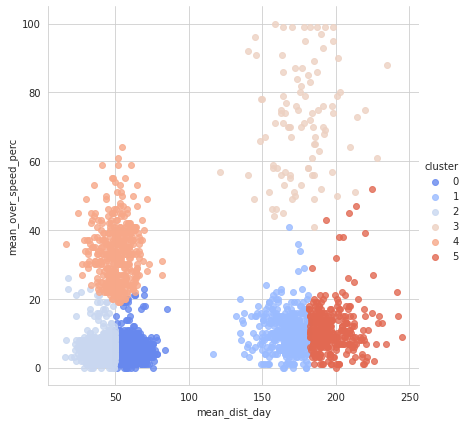

In [28]:
df_analyze['cluster']=kmeans_6.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day', 'mean_over_speed_perc', data=df_analyze, hue='cluster', 
           palette='coolwarm', size=6, aspect=1, fit_reg=False)